In [1]:
import pandas as pd
from matplotlib import pyplot as plt
!ls

 dam_outflow.txt  'Plot dam outflow.ipynb'


In [2]:
daily_flow_file = "dam_outflow.txt"

In [3]:
df = pd.read_csv(daily_flow_file, names=['date', 'd_avg', 'quality'], header=None, skiprows=12, 
                 delimiter='     ', engine='python')[:-14] # (The last 14 rows are misc text)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d', errors='coerce')
df.head(5)

,date,d_avg,quality
0,2000-01-01,4.996,1.0
1,2000-01-02,4.969,1.0
2,2000-01-03,5.006,1.0
3,2000-01-04,5.012,1.0
4,2000-01-05,5.051,1.0


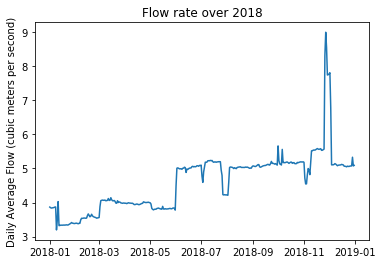

In [7]:
# Select just the year 2018
df_2018 = df.loc[(df['date'] > '2017-12-31') & (df['date'] <= '2018-12-31')]

# Plot the graph
plt.plot(df_2018['date'],df_2018['d_avg'])
plt.title('Flow rate over 2018')
plt.ylabel('Daily Average Flow (cubic meters per second)')
plt.savefig('daily_flow_2018.png')

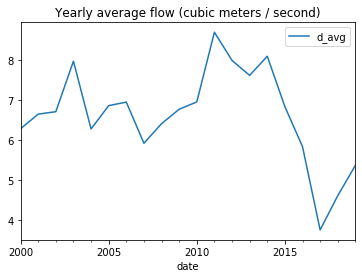

In [17]:
df.resample('1Y', on='date').mean().plot(y='d_avg', title='Yearly average flow (cubic meters / second)')